Importing the necessary packages

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Blen\OneDrive\Desktop\10Academy\Week0\data\togo-dapaong_qc.csv')

Calculating mean, mode, and SD

In [3]:
summary_stats = df.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

Checking for missing values and outliers

In [4]:
missing_values = df.isnull().sum()
outliers = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(missing_values)
print(outliers)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...

Handling missing values and anomalies
(Replace those entries that have negative values for GHI, DNI, and DHI with zero)

In [5]:
df.drop('Comments', axis=1, inplace=True)
df['GHI'] = df['GHI'].clip(lower=0)
df['DNI'] = df['DNI'].clip(lower=0)
df['DHI'] = df['DHI'].clip(lower=0)

Check for outliers in sensor readings (ModA, ModB) and wind speed data (WS, WSgust) using z-score.
And removing the rows with outliers on them

In [6]:
import numpy as np
from scipy import stats

In [7]:
z_scores = np.abs(stats.zscore(df[['ModA', 'ModB', 'WS', 'WSgust']]))


outliers = (z_scores > 3).any(axis=1)

df = df[~outliers]

In [8]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


Checking the data after cleaning

In [9]:
missing_values = df.isnull().sum()
outliers = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(missing_values)
print(outliers)

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


Calculating the total number of rows after cleaning the data

In [10]:
total_rows = df.shape[0]
print("Total number of rows:", total_rows)

Total number of rows: 520837


Heatmap for correlation matrix

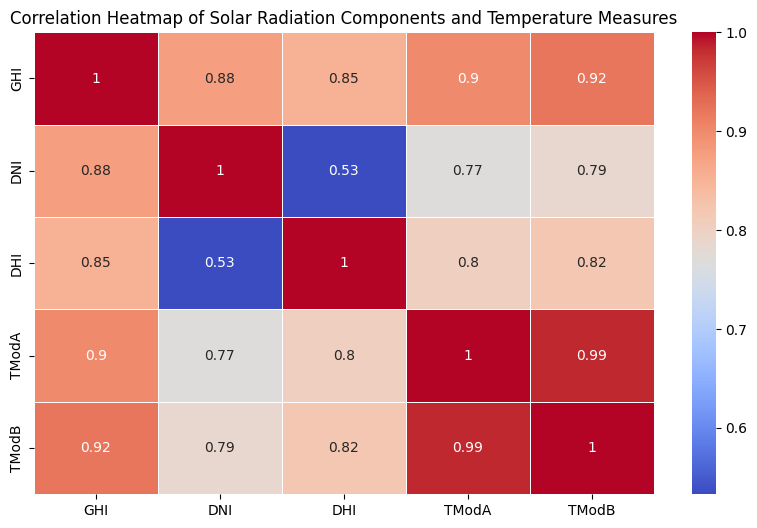

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Solar Radiation Components and Temperature Measures")
plt.show()

Pair plot for visualizing relationships

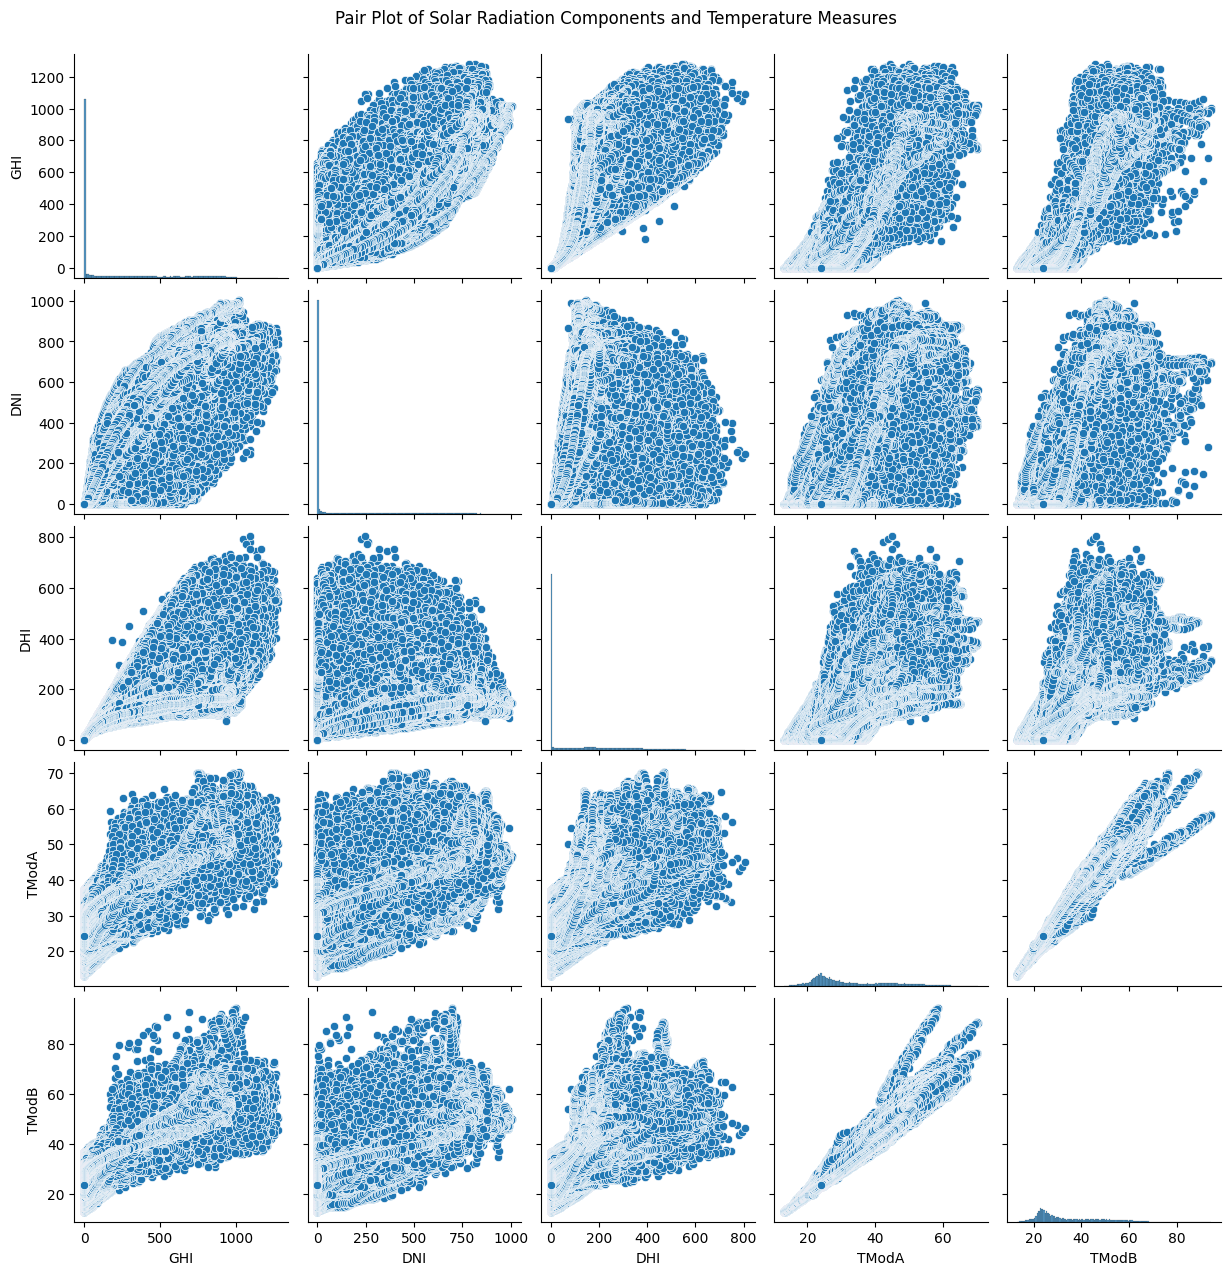

In [12]:
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle("Pair Plot of Solar Radiation Components and Temperature Measures", y=1.02)
plt.show()

Scatter Matrix for Wind Conditions vs. Solar Irradiance

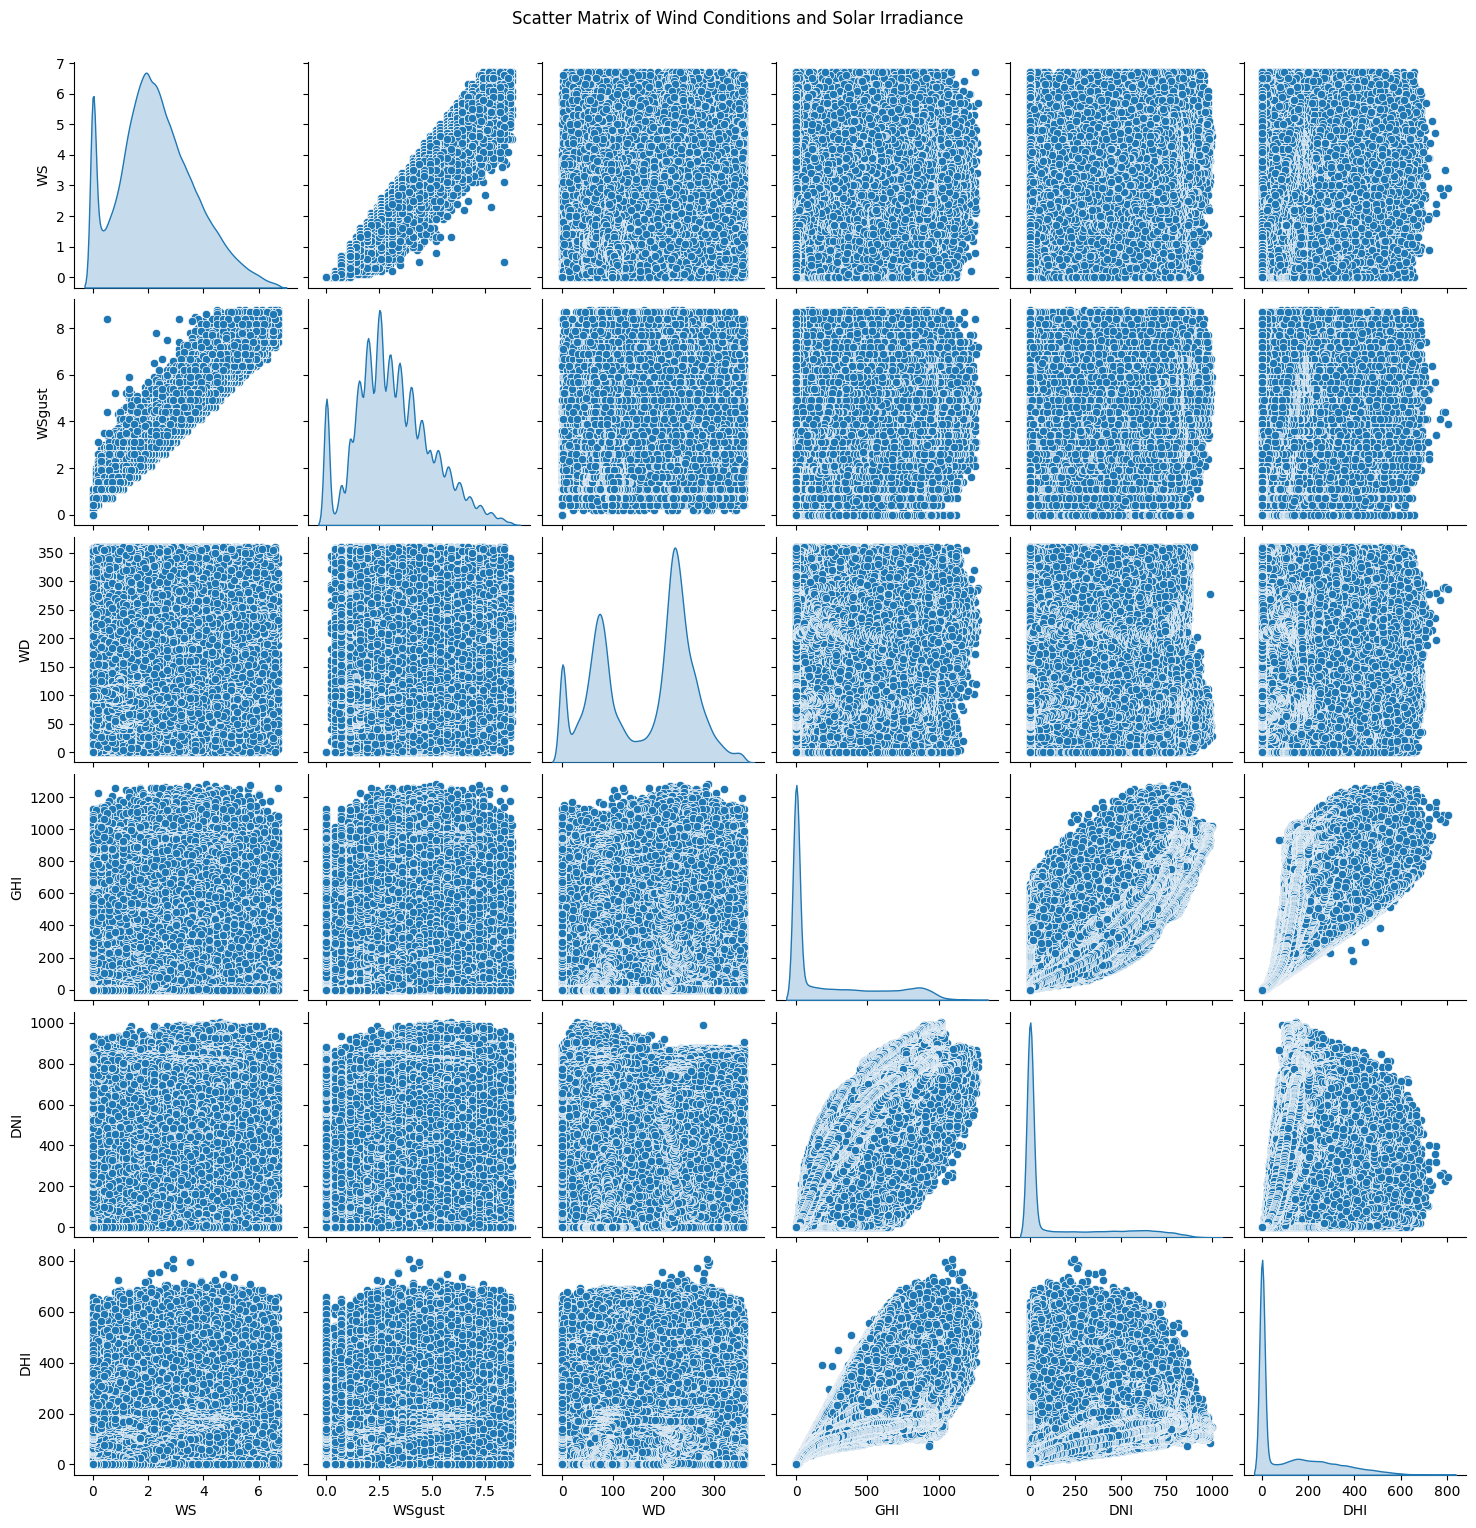

In [13]:
sns.pairplot(df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']], diag_kind='kde')
plt.suptitle("Scatter Matrix of Wind Conditions and Solar Irradiance", y=1.02)
plt.show()

Creating polar plots for wind speed and direction

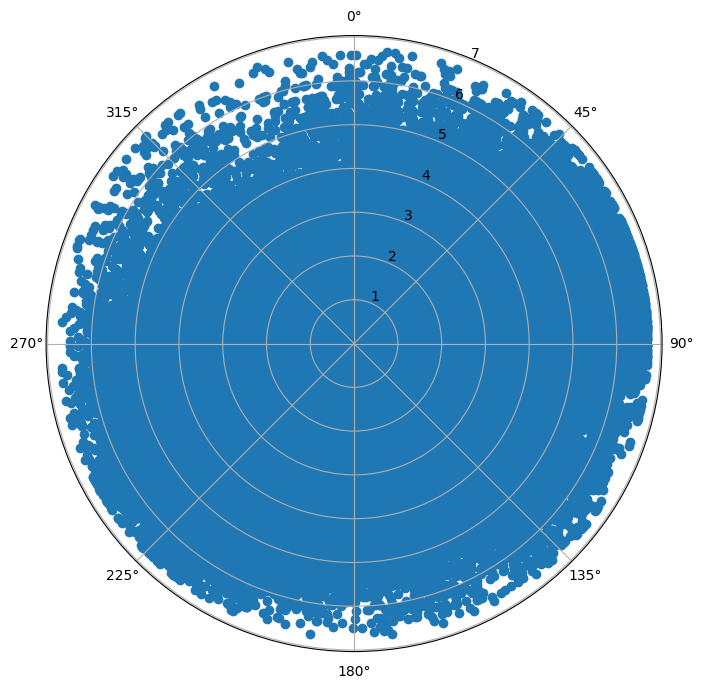

In [14]:
theta = np.deg2rad(df['WD'])
r = df['WS']

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(theta, r)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
plt.show()

Temperature and Humidity Analysis:

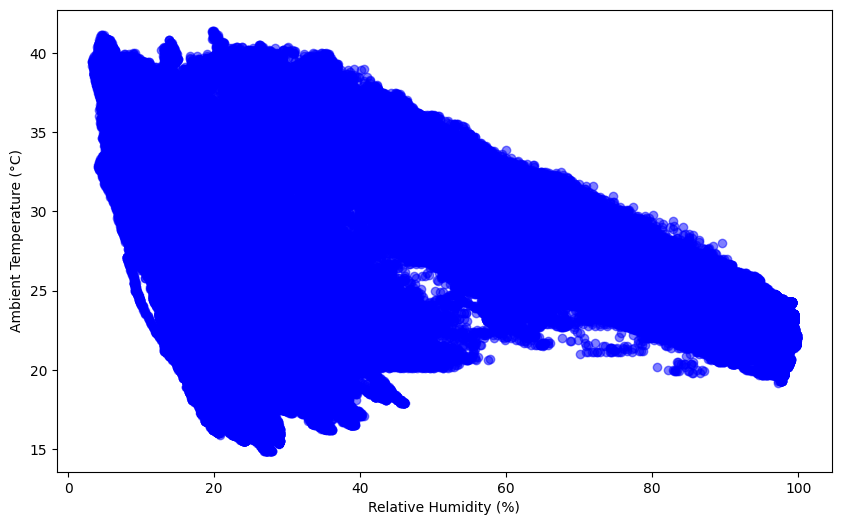

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RH'], df['Tamb'], c='blue', alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()